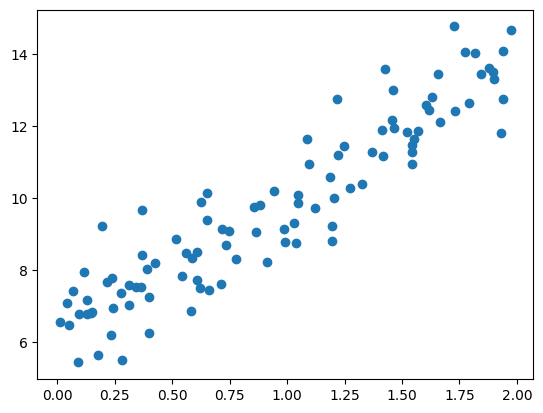

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

X = 2 * np.random.rand(100,1)

error = np.random.randn(100,1)
y = 6 + 4*X + error

plt.scatter(X, y)

In [2]:
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
         
    w0_factors = np.ones((N,1))

    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))    
    
    return w1_update, w0_update

In [3]:
def get_cost(y, y_pred):
    N = len(y)
    
    cost = np.sum(np.square(y - y_pred))/N
    
    return cost

In [4]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        stochastic_random_index = np.random.permutation(X.shape[0])
        
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [5]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)

print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))

w1: 3.817 w0: 6.149


In [6]:
y_pred = w1[0,0] * X + w0

print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

Stochastic Gradient Descent Total Cost:0.8078
